In [40]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.descriptivestats import sign_test
import matplotlib.pyplot as plt

## Исходные данные

In [41]:
np.random.seed(444)
X = np.random.uniform(-5, 5, 300)
np.random.seed(228)
Y = np.random.uniform(-5, 5, 300)

m_x = 0
m_y = 0
var_x = 10/12
var_y = 10/12

In [42]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X_s = np.var(X, ddof = 1)
Y_s = np.var(Y, ddof = 1)

X_q = np.std(X, ddof = 1)
Y_q = np.std(Y, ddof = 1)

In [43]:
X_mean, X_s, X_q

(0.14017535101571346, 7.46796192138233, 2.7327572013229293)

(0.14017535101571346, 7.46796192138233, 2.7327572013229293)

In [44]:
bins_number = int(2*X.shape[0]**(1/3))
x_fr, _ = np.histogram(X, bins=bins_number)
x_fr

array([19, 21, 18, 19, 26, 30, 32, 14, 28, 32, 21, 15, 25], dtype=int64)

array([19, 21, 18, 19, 26, 30, 32, 14, 28, 32, 21, 15, 25], dtype=int64)

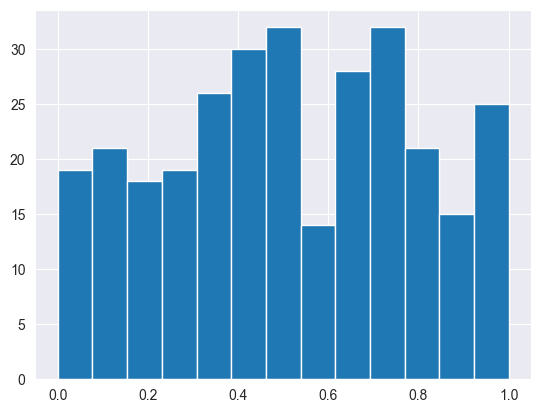

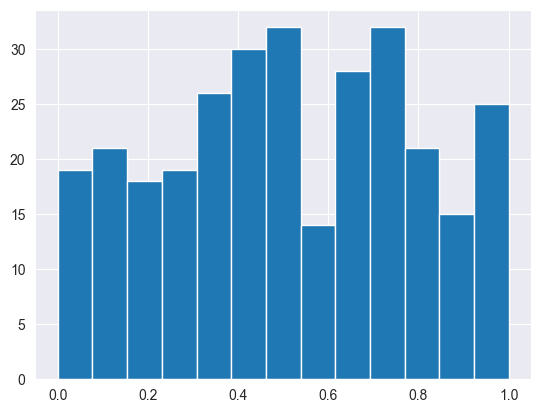

In [45]:
bins_number = int(2*X.shape[0]**(1/3))
# x_f, _, _ = plt.hist(X, bins=bins_number)
x_1 = (X + abs(min(X))) / (max(X) - min(X))
x_f, _, _ = plt.hist(x_1, bins=bins_number)
plt.show()

In [46]:
# x = np.linspace(-10, 10, 10000)
# Y = stats.uniform.pdf(x, min(X), max(X) - min(X)) * np.mean(x_f)
# plt.plot(x,Y)

In [47]:
bins_number = int(2*X.shape[0]**(1/3))
X_hist = np.histogram(X, bins=bins_number)
stats.kstest(x_1, 'uniform')

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

In [48]:
stats.kstest(X, lambda x: stats.uniform.cdf(x, -abs(min(X)), max(X) - min(X)))

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

## Визуальное представление выборки

<AxesSubplot: title={'center': 'Гистограмма с 20 NBins'}>

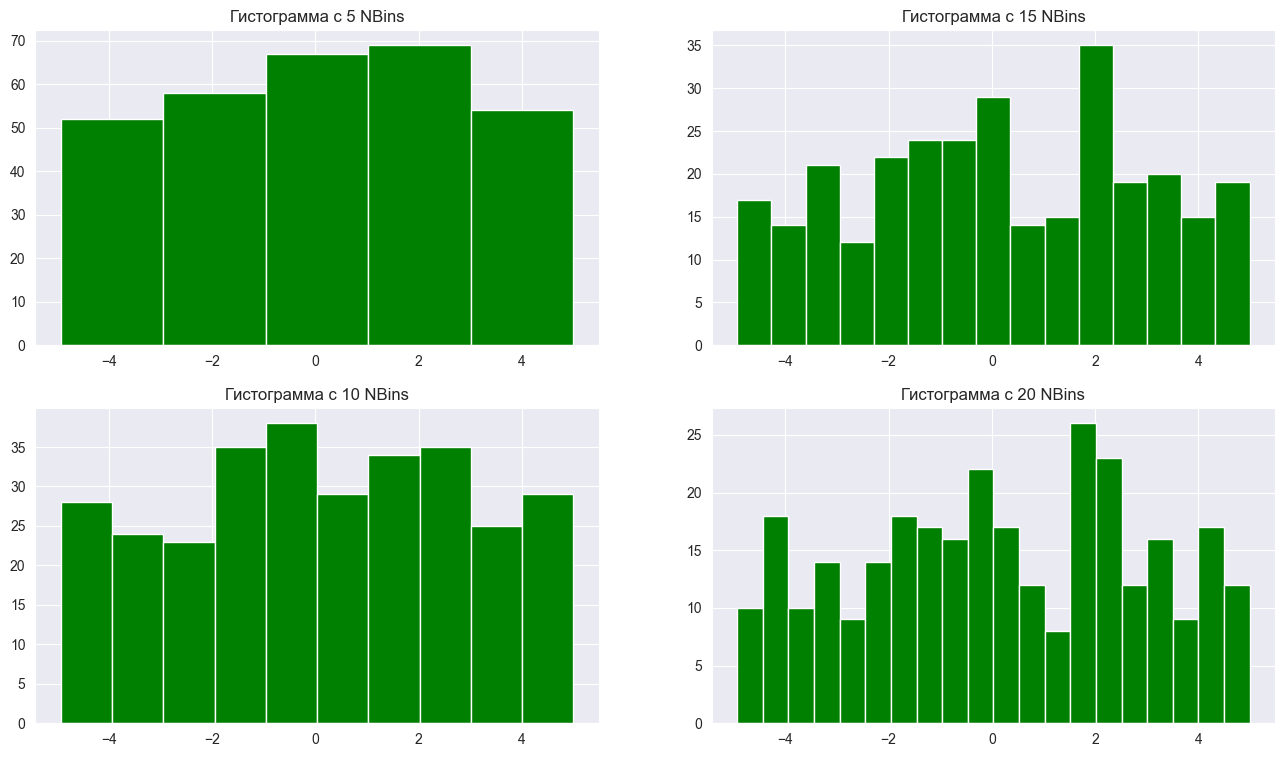

<AxesSubplot: title={'center': 'Гистограмма с 20 NBins'}>

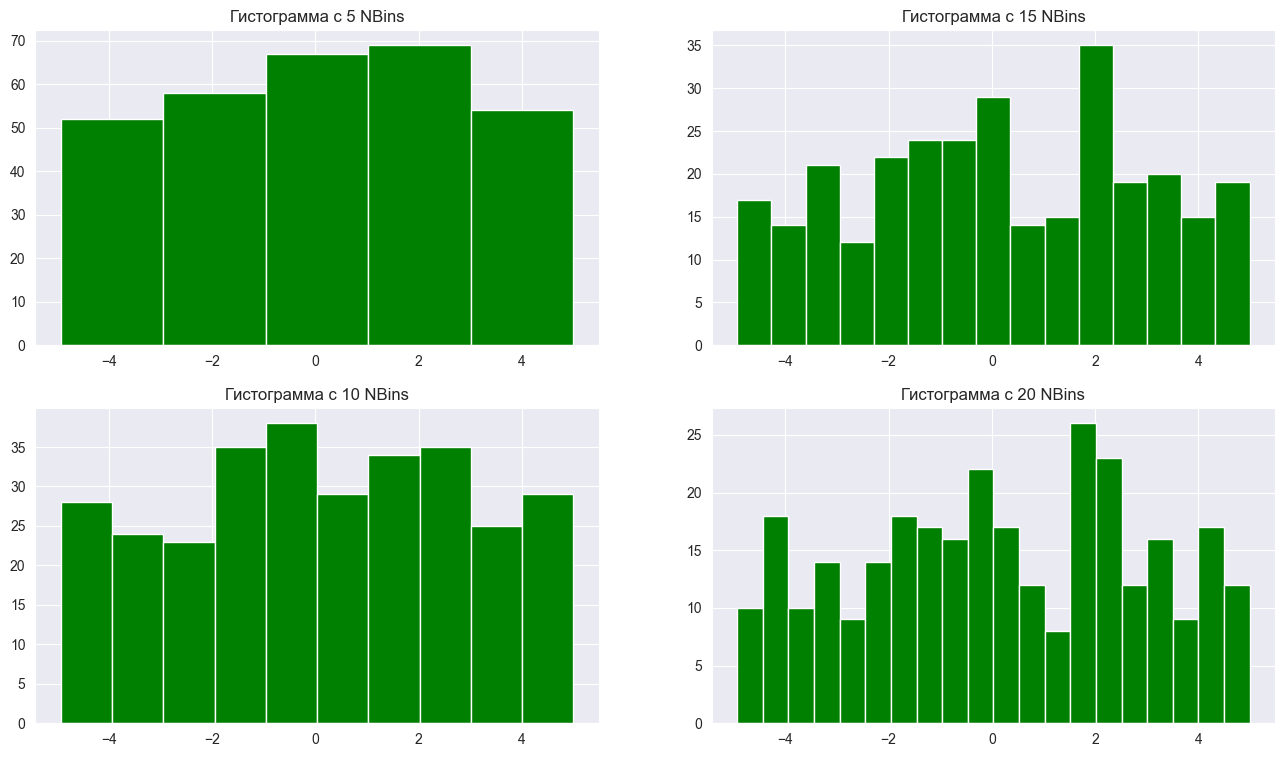

In [49]:
def plot_hist(array, ax, bins_num: int):
    ax.hist(array, bins = bins_num, color='green')
    ax.set_title(f'Гистограмма с {bins_num} NBins')
    return ax

fig, ax = plt.subplots(2, 2, figsize = (16, 9))
plot_hist(X, ax[0,0], 5)
plot_hist(X, ax[1,0], 10)
plot_hist(X, ax[0,1], 15)
plot_hist(X, ax[1,1], 20)

## Критерий хи-квадрат

### Статистическая гипотеза: $ H_0: X \sim N(m, \sigma) $

In [50]:
m = np.mean(X)
d = np.var(X, ddof = 0)
bins_number = int(2*X.shape[0]**(1/3))

In [51]:
def chisquare_normal(dist, m, d, bins, ddof=1):
    counts, bins1 = np.histogram(dist, bins=bins)
    normal = (stats.norm.cdf(bins1[1:], m, d) - stats.norm.cdf(bins1[:-1], m, d)) * dist.shape[0]
    Z = np.sum((counts - normal) ** 2 / normal)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [52]:
chisquare_normal(X, m, d, 5)

(157.33279353986083, 0.0)

(157.33279353986083, 0.0)

In [53]:
chisquare_normal(X, m, d, 10)

(166.46782989631404, 0.0)

(166.46782989631404, 0.0)

In [54]:
chisquare_normal(X, m, d, 15)

(200.85708510961317, 0.0)

(200.85708510961317, 0.0)

In [55]:
chisquare_normal(X, m, d, 20)

(210.00454680933044, 0.0)

(210.00454680933044, 0.0)

### Статистическая гипотеза: $ H_0: X \sim R $

In [56]:
def chisquare_uniform(dist, bins, ddof=2):
    counts, bins1 = np.histogram(dist, bins=bins)
    uniform = (stats.uniform.cdf(bins1[1:], min(dist), max(dist) - min(dist)) - stats.uniform.cdf(bins1[:-1], min(dist), max(dist) - min(dist))) * dist.shape[0]
    Z = np.sum((counts - uniform) ** 2 / uniform)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [57]:
chisquare_uniform(X, 5)

(3.9000000000000075, 0.14227407158651306)

(3.9000000000000075, 0.14227407158651306)

In [58]:
chisquare_uniform(X, 10)

(8.200000000000008, 0.3152890614332803)

(8.200000000000008, 0.3152890614332803)

In [59]:
chisquare_uniform(X, 15)

(26.99999999999994, 0.007727195606984982)

(26.99999999999994, 0.007727195606984982)

In [60]:
chisquare_uniform(X, 20)

(31.066666666666602, 0.019602556154794448)

(31.066666666666602, 0.019602556154794448)

### Статистическая гипотеза: $ H_0: X \sim {\chi}^2(5) $

In [61]:
def chisquare_chi2(dist, bins, ddof=0):
    counts, bins1 = np.histogram(dist, bins=bins)
    chi2 = (stats.chi2.cdf(bins1[1:], 5) - stats.chi2.cdf(bins1[:-1], 5)) * dist.shape[0]
    Z = np.sum((counts - chi2) ** 2 / chi2)
    return Z, 1 - stats.chi2.cdf(Z, bins - 1 - ddof)

In [62]:
chisquare_chi2(X, 5)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_12804\2379913917.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_12804\2379913917.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

In [63]:
chisquare_chi2(X, 10)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_12804\2379913917.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_12804\2379913917.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

$\infty$

In [64]:
chisquare_chi2(X, 15)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_12804\2379913917.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_12804\2379913917.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

In [65]:
chisquare_chi2(X, 20)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_12804\2379913917.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

C:\Users\Artemii\AppData\Local\Temp\ipykernel_12804\2379913917.py:4: RuntimeWarning: divide by zero encountered in divide
  Z = np.sum((counts - chi2) ** 2 / chi2)


(inf, 0.0)

## Критерий Колмогорова

### Статистическая гипотеза: $ H_0: X \sim N(m, \sigma) $

In [66]:
stats.kstest(x_1, 'norm')

KstestResult(statistic=0.5, pvalue=7.063417378483841e-70)

KstestResult(statistic=0.5, pvalue=7.063417378483841e-70)

### Статистическая гипотеза: $ H_0: X \sim R $

In [67]:
stats.kstest(x_1, 'uniform')

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

KstestResult(statistic=0.05719738779120209, pvalue=0.2697275576535686)

### Статистическая гипотеза: $ H_0: X \sim {\chi}^2(5) $

In [68]:
stats.kstest(X, lambda x: stats.chi2.cdf(x, 5))

KstestResult(statistic=0.5627599633619769, pvalue=3.878973291371123e-90)

KstestResult(statistic=0.5627599633619769, pvalue=3.878973291371123e-90)

In [69]:
stats.chi2.stats(5)

(array(5.), array(10.))

(array(5.), array(10.))

## Двухвыборочные критерии 

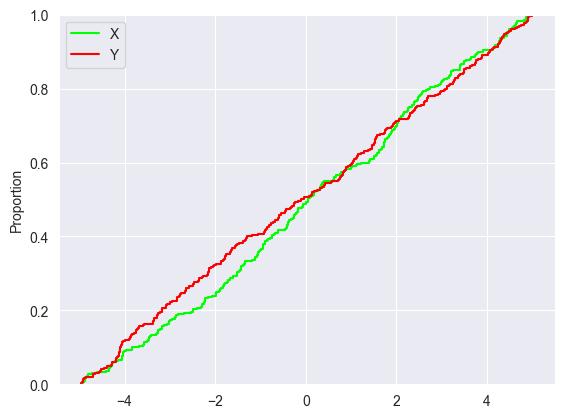

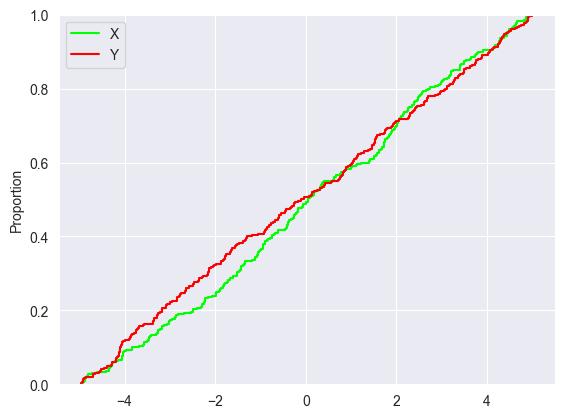

In [70]:
import seaborn as sns

sns.ecdfplot(x = X, color='lime')
sns.ecdfplot(x = Y, color='red')
plt.xlabel = 'values'
plt.legend(labels=['X', 'Y'])
plt.show()

<AxesSubplot: ylabel='Count'>

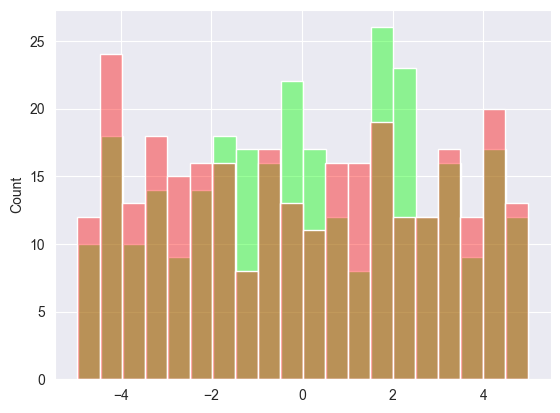

<AxesSubplot: ylabel='Count'>

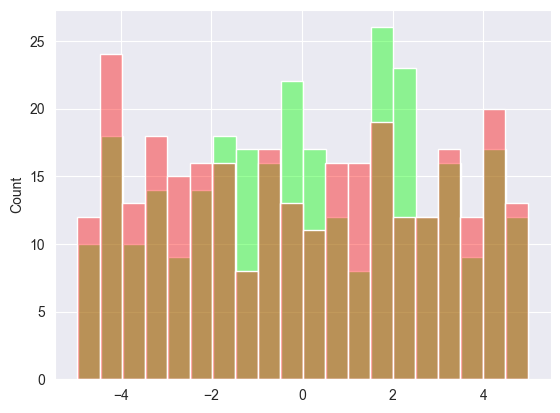

In [71]:
sns.histplot(X, bins = 20, color='lime', alpha =0.4)
sns.histplot(Y, bins = 20, color = 'red', alpha = 0.4)

<AxesSubplot: ylabel='Proportion'>

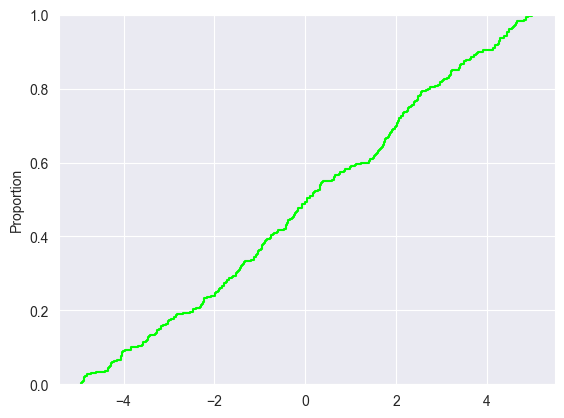

<AxesSubplot: ylabel='Proportion'>

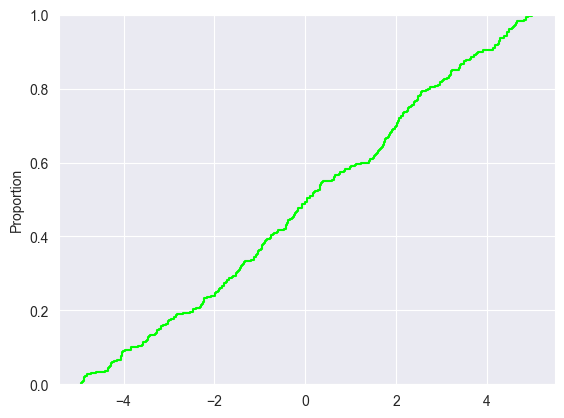

In [72]:
sns.ecdfplot(x = X, color='lime')

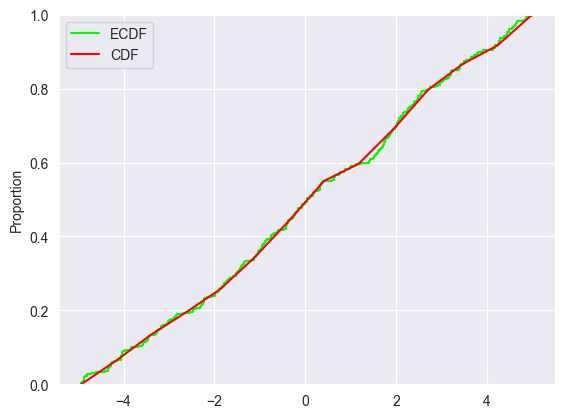

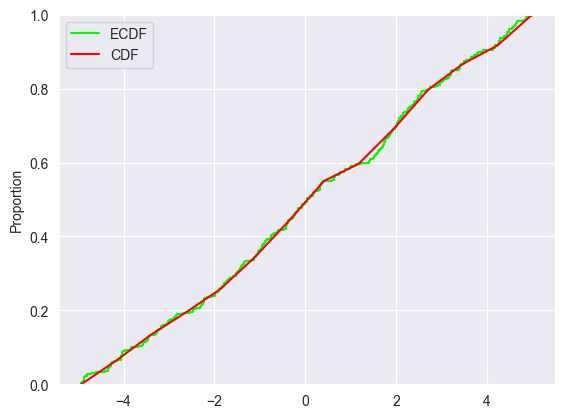

In [73]:
sns.ecdfplot(x = X, color='lime', label="ECDF")
count, bins_count = np.histogram(X, bins=bins_number)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
cdf1 = np.insert(cdf, 0, 0)
bins_count1 = np.insert(bins_count, 0, -5)
plt.plot(bins_count1[1:], cdf1, color='red',label="CDF")
plt.legend()

In [74]:
def two_sample_chisquare(dist1, dist2, bins=15):
    bins1, counts1 = np.histogram(dist1, bins=bins)
    bins2, counts2 = np.histogram(dist2, bins=bins)
    Z = np.sum((counts1 - counts2) ** 2 / counts1)
    return Z, 1 - stats.chi2.cdf(Z, 2)
    

Peasrson $ {\chi}^2 $ test

In [75]:
two_sample_chisquare(X, Y, bins_number)

(-0.0008474661813318725, 1.0)

(-0.0008474661813318725, 1.0)

Kolmogorov-Smirnov test

In [76]:
stats.ks_2samp(X, Y)

KstestResult(statistic=0.08666666666666667, pvalue=0.21005749381264038)

KstestResult(statistic=0.08666666666666667, pvalue=0.21005749381264038)

Sign-test


In [77]:
sign_test(X, Y)

(4.0, 0.6861754232113881)

(4.0, 0.6861754232113881)

U-test

In [78]:
stats.ranksums(X, Y)

RanksumsResult(statistic=0.8694884733068824, pvalue=0.3845800100471043)

RanksumsResult(statistic=0.8694884733068824, pvalue=0.3845800100471043)

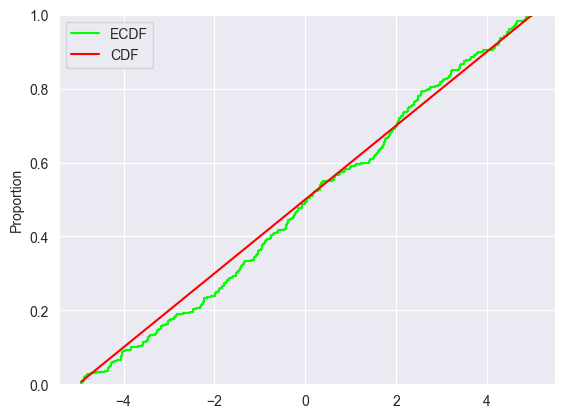

In [87]:
# sns.ecdfplot(x = X, color='lime', label="ECDF")
x = np.arange(min(X), max(X), 0.001)

sns.ecdfplot(x = X, color='lime',label="ECDF")
plt.plot(x, stats.uniform.cdf(x, -5, 10), color='red', label="CDF")

plt.legend()